# XAI Project Work

## Dataset

### Importazione

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
path_white = "/Users/nicolomelchioretto/venv/UniMIB/DataProcessingAndAnalysis/Homework/wine+quality/winequality-white.csv"
path_red = "/Users/nicolomelchioretto/venv/UniMIB/DataProcessingAndAnalysis/Homework/wine+quality/winequality-red.csv"

white_data = pd.read_csv(path_white, sep = ";")
red_data = pd.read_csv(path_red, sep = ";")

### Descrizione e missing

In [4]:
print(f'Il dataset dei vini bianchi ha {len(white_data)} righe.\nIl dataset dei vini rossi ha {len(red_data)} righe.')

Il dataset dei vini bianchi ha 4898 righe.
Il dataset dei vini rossi ha 1599 righe.


In [5]:
red_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
white_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
white_data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1743,8.3,0.30,0.36,10.0,0.042,33.0,169.0,0.99820,3.23,0.51,9.3,6
658,6.6,0.27,0.25,3.1,0.052,41.0,188.0,0.99150,3.24,0.40,11.3,5
2089,7.9,0.17,0.32,1.6,0.053,47.0,150.0,0.99480,3.29,0.76,9.6,6
3148,6.2,0.23,0.36,17.2,0.039,37.0,130.0,0.99946,3.23,0.43,8.8,6
1571,7.4,0.30,0.49,8.2,0.055,49.0,188.0,0.99740,3.52,0.58,9.7,6


In [8]:
red_data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
399,8.7,0.765,0.22,2.3,0.064,9.0,42.0,0.99630,3.10,0.55,9.4,5
1322,9.1,0.340,0.42,1.8,0.058,9.0,18.0,0.99392,3.18,0.55,11.4,5
1140,7.3,0.400,0.30,1.7,0.080,33.0,79.0,0.99690,3.41,0.65,9.5,6
1093,9.2,0.310,0.36,2.2,0.079,11.0,31.0,0.99615,3.33,0.86,12.0,7
1334,7.2,0.835,0.00,2.0,0.166,4.0,11.0,0.99608,3.39,0.52,10.0,5


### Concatenazione

In [53]:
white_data['tipo'] = "white"
white_data.sample(5)


red_data['tipo'] = "red"
red_data.sample(5)

wine = pd.concat([white_data, red_data])

wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo,tipo
2959,7.3,0.40,0.26,5.45,0.016,26.0,90.0,0.98951,2.84,0.54,13.2,7,white,white
1320,7.6,0.19,0.42,1.50,0.044,6.0,114.0,0.99140,3.04,0.74,12.8,6,white,white
3362,7.2,0.22,0.28,7.20,0.060,41.0,132.0,0.99350,3.08,0.59,11.3,6,white,white
3006,6.2,0.16,0.32,1.10,0.036,74.0,184.0,0.99096,3.22,0.41,11.0,6,white,white
4420,6.6,0.22,0.23,17.30,0.047,37.0,118.0,0.99906,3.08,0.46,8.8,6,white,white
1391,8.0,0.64,0.22,2.40,0.094,5.0,33.0,0.99612,3.37,0.58,11.0,5,red,red
463,6.8,0.32,0.21,2.20,0.044,15.0,68.0,0.99320,3.17,0.39,9.4,6,white,white
2242,6.1,0.23,0.45,10.60,0.094,49.0,169.0,0.99699,3.05,0.54,8.8,5,white,white
2401,9.2,0.16,0.49,2.00,0.044,18.0,107.0,0.99514,3.10,0.53,10.2,4,white,white
4642,5.7,0.24,0.30,1.30,0.030,25.0,98.0,0.98968,3.37,0.43,12.4,7,white,white


In [54]:
wine.value_counts("tipo")

tipo
white    4898
red      1599
dtype: int64

In [55]:
wine.value_counts("quality")

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
dtype: int64

In [72]:
wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

### Ricodifica di *quality* tramite *vote*

Ricodifichiamo la feature target *quality* in:
- **bad** se $ 0 \leq quality \leq 5 $

- **good** se $ quality \geq 6 $

Notiamo dalla riga precedente che *quality* assume 7 valori: 3 di questi verrano ricodificati come Bad e 4 come Good. Così facendo si rischia un potenziale sbilanciamento dei dati poichè in Good finiscono un numero maggiore di classi. Lo verificheremo nella sezione sucessiva.

In [56]:
wine['vote'] = np.where(wine['quality'] < 6, 'Bad', 'Good')

wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo,tipo,vote
1877,8.0,0.20,0.36,1.2,0.032,21.0,78.0,0.99210,3.08,0.37,10.4,6,white,white,Good
4107,6.8,0.30,0.26,20.3,0.037,45.0,150.0,0.99727,3.04,0.38,12.3,6,white,white,Good
960,7.3,0.24,0.34,15.4,0.050,38.0,174.0,0.99830,3.03,0.42,9.0,6,white,white,Good
1274,8.4,0.35,0.56,13.8,0.048,55.0,190.0,0.99930,3.07,0.58,9.4,6,white,white,Good
529,5.6,0.19,0.47,4.5,0.030,19.0,112.0,0.99220,3.56,0.45,11.2,6,white,white,Good


## Exploratory

Conteggio di *vote* raggruppando per *tipo*

In [70]:
wine.groupby('tipo')['vote'].value_counts()

tipo   vote
red    Good     855
       Bad      744
white  Good    3258
       Bad     1640
Name: vote, dtype: int64

Effettivamente, a prescindere dal raggruppamento red-white, le unità codificate come Good sono molto di più rispetto a quelle Bad, specialmente - anzi, unicamente - per quanto riguarda i vini bianchi. Ci si pone quindi il seguente problema: è preferibile tenere così i dati, e considerando che le valutazioni sono date in questo modo può aver senso, oppure è necessario bilanciare le classi, magari facendo undersampling sui vini bianchi Good?

## Visualitzation

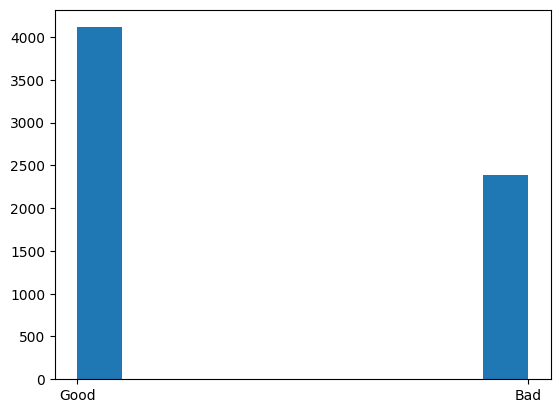

In [57]:
plt.hist(wine.vote)
plt.show()

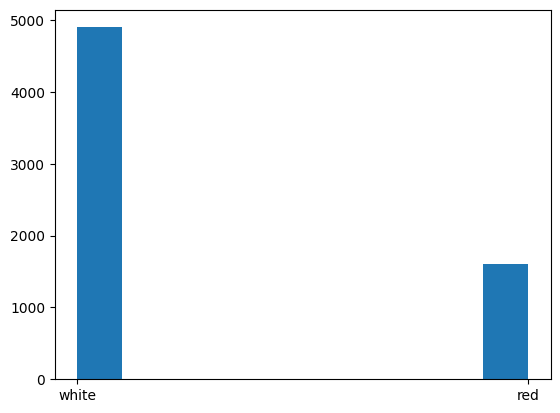

In [58]:
plt.hist(wine.tipo)
plt.show()

In [64]:
wine.iloc[3]["vote"]

'Good'

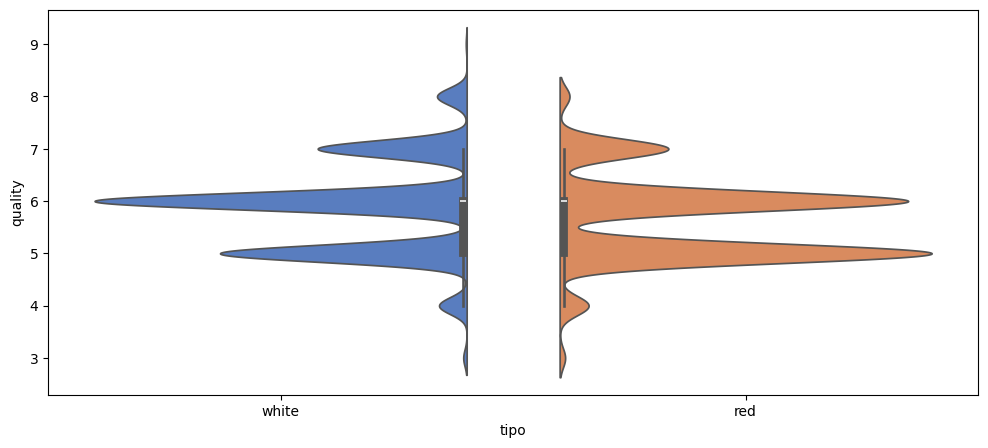

In [88]:
plt.figure(figsize=(12, 5))
sns.violinplot(x="tipo",
               y="quality",
               hue="tipo", 
               data=wine,
               gridsize=1000,
               palette="muted",
               split=True,
               saturation=0.75)
plt.show()
# NON molto senso sto plot forse...alla fine è un density estimator però orizzontale, sicuro meglio farlo verticale magari mettendo:
# asse x : tipo white - red ;; asse y : quality ;; colore riempimento istogramma/curva/quellochesarà vote Good-Bad (oppure invece del colore mettere tipo una linea orizzonatale)

**NB: il prossimo grafico scatter plot può essere figo metterlo una volta trovate le varaibili pià importanti magari prendendo le pirme 2 per gli assi e la terza per colorare i punti** 

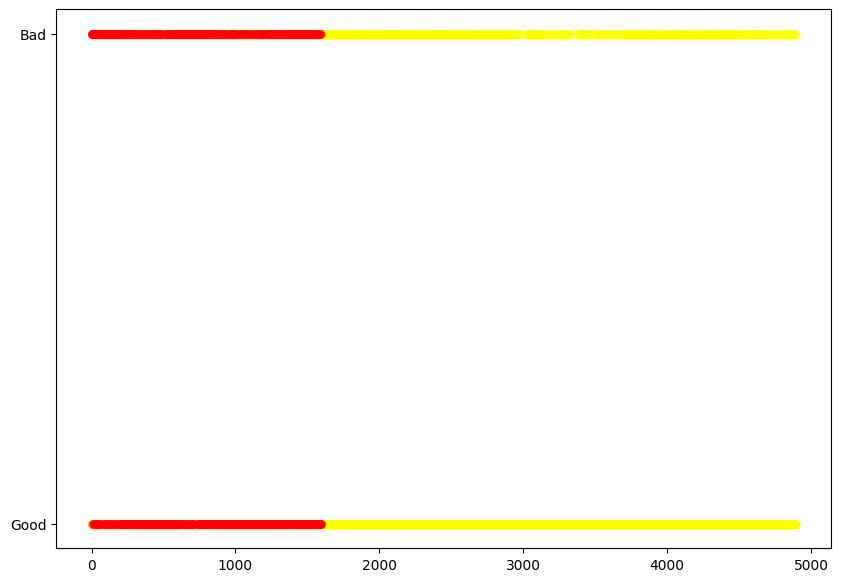

In [67]:
plt.figure(figsize=(10, 7))

for i in range(len(wine)):
    if wine.iloc[i]["tipo"] == "white":
        # se è bianco
        alpha = 0.3
        size = 28
        c = "yellow"
    else :
        # se è rosso
        alpha = 0.3
        size = 28
        c = "red"
        
#da mettere assi decenti con variabili importanti e il colore pure sarà probabilemnteb Good e Bad
    plt.scatter(wine.index[i], wine.iloc[i]["vote"], color = c, alpha = alpha, s = size)
plt.show()

## Random Forest (fatto solo copy paste)

### Preprocessing 

In [ ]:
# Define feature columns
feature_cols = [
    'age', 'workclass', 'education', 'educational-num', 'marital-status',
    'occupation', 'relationship', 'race', 'gender', 'capital-gain',
    'capital-loss', 'hours-per-week', 'native-country'
]
# Define the target column
target_col = 'income'

X = df[feature_cols]
y = df[target_col].apply(lambda x: 1 if x == '>50K' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

numeric_features = [
    'age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'
]
numeric_transformer = StandardScaler()

categorical_features = [
    'workclass', 'education', 'marital-status', 'occupation', 'relationship',
    'race', 'gender', 'native-country'
]
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
])

### Fit

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Create a pipeline with the preprocessor and a Random Forest classifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',
                       RandomForestClassifier(random_state=42, n_jobs=-1))])

# Train the Random Forest model
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')